<a href="https://colab.research.google.com/github/cstirneman1/MLA_CMS/blob/main/FinalProject_Regression_CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Stirneman



#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Imports for specific models


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

#Imports for Splitting data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Preformance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Reading the Data

This data set is used to predict the age of abalone from physical measurements (Old vs young).The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, are used to predict the age.

Sex is decribed as Male (M), Female(F), and Infant (I)



In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/abalone.csv')

threshold = 10
df['Age_Category'] = (df['Rings'] >= threshold).astype(int)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Sex,Length,Diameter,Height,Whole-weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age_Category
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


#Statistical and Visual Exploration


Summary and counts of the data

In [45]:
summary_statistics = df.describe()
print("Summary Statistics for Numerical Columns:")
print(summary_statistics)

category_counts = df['Sex'].value_counts()
print("\nCounts for Categorical Data (Sex):")
print(category_counts)

Summary Statistics for Numerical Columns:
            Length     Diameter       Height  Whole-weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  Age_Category  
count     4177.000000   4177.000000  4177.000000   4177.000000  
mean         0.180594      0.238831     9.933684      0.498204  
std          0.109614      0.139203     3.224169      0.5000

Plots of the data

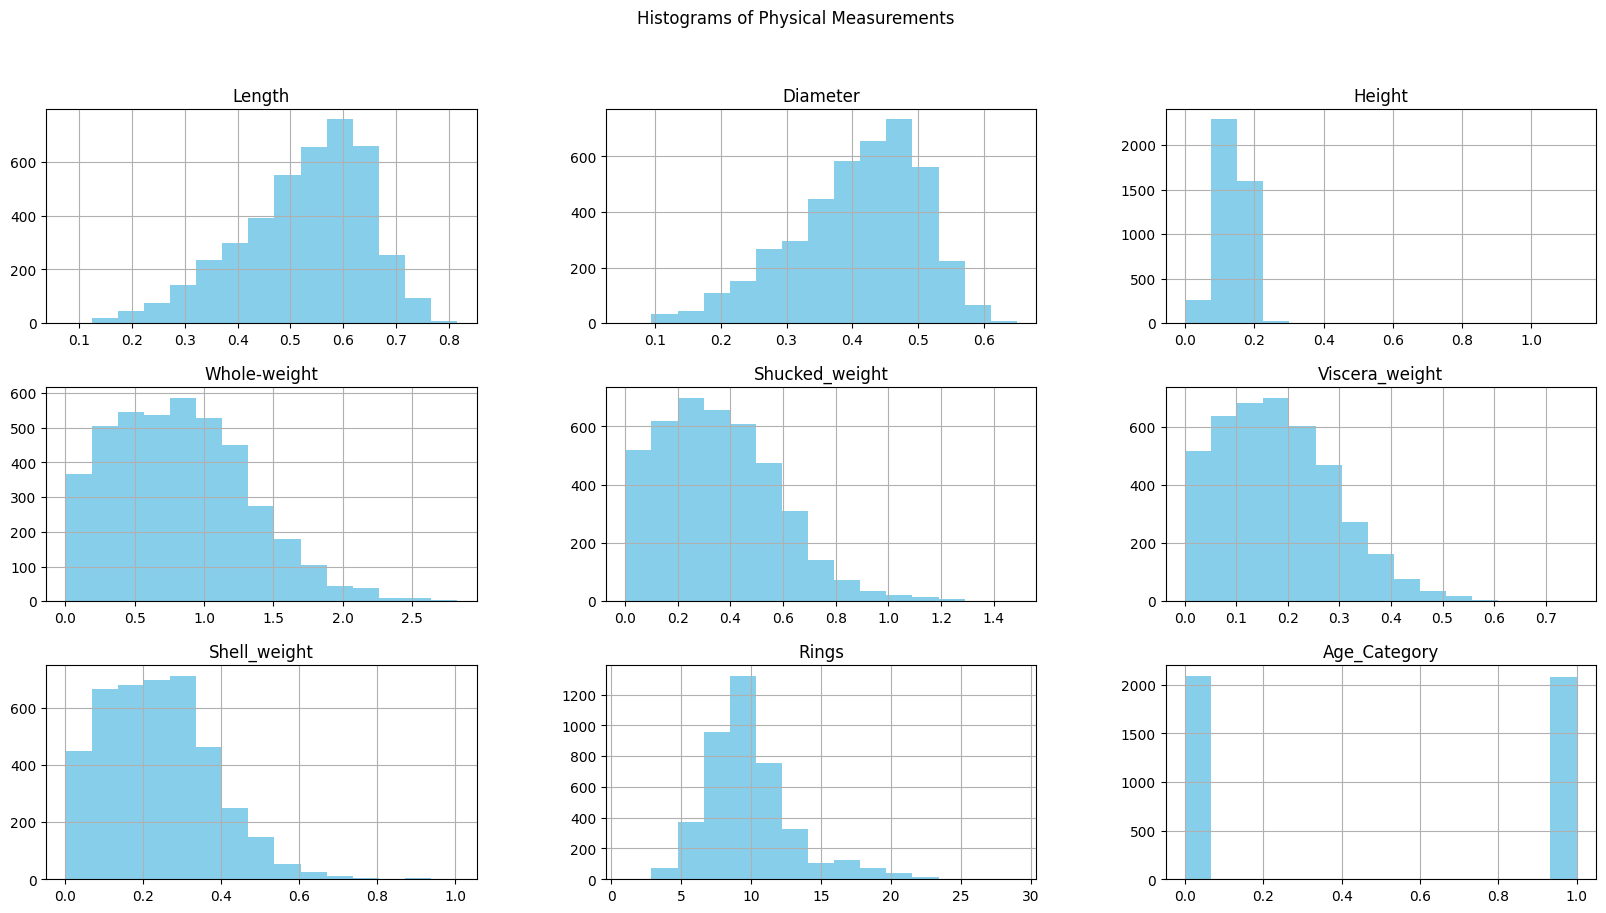

In [46]:
df.hist(bins=15, figsize=(20, 10), color='skyblue')
plt.suptitle('Histograms of Physical Measurements')
plt.show()

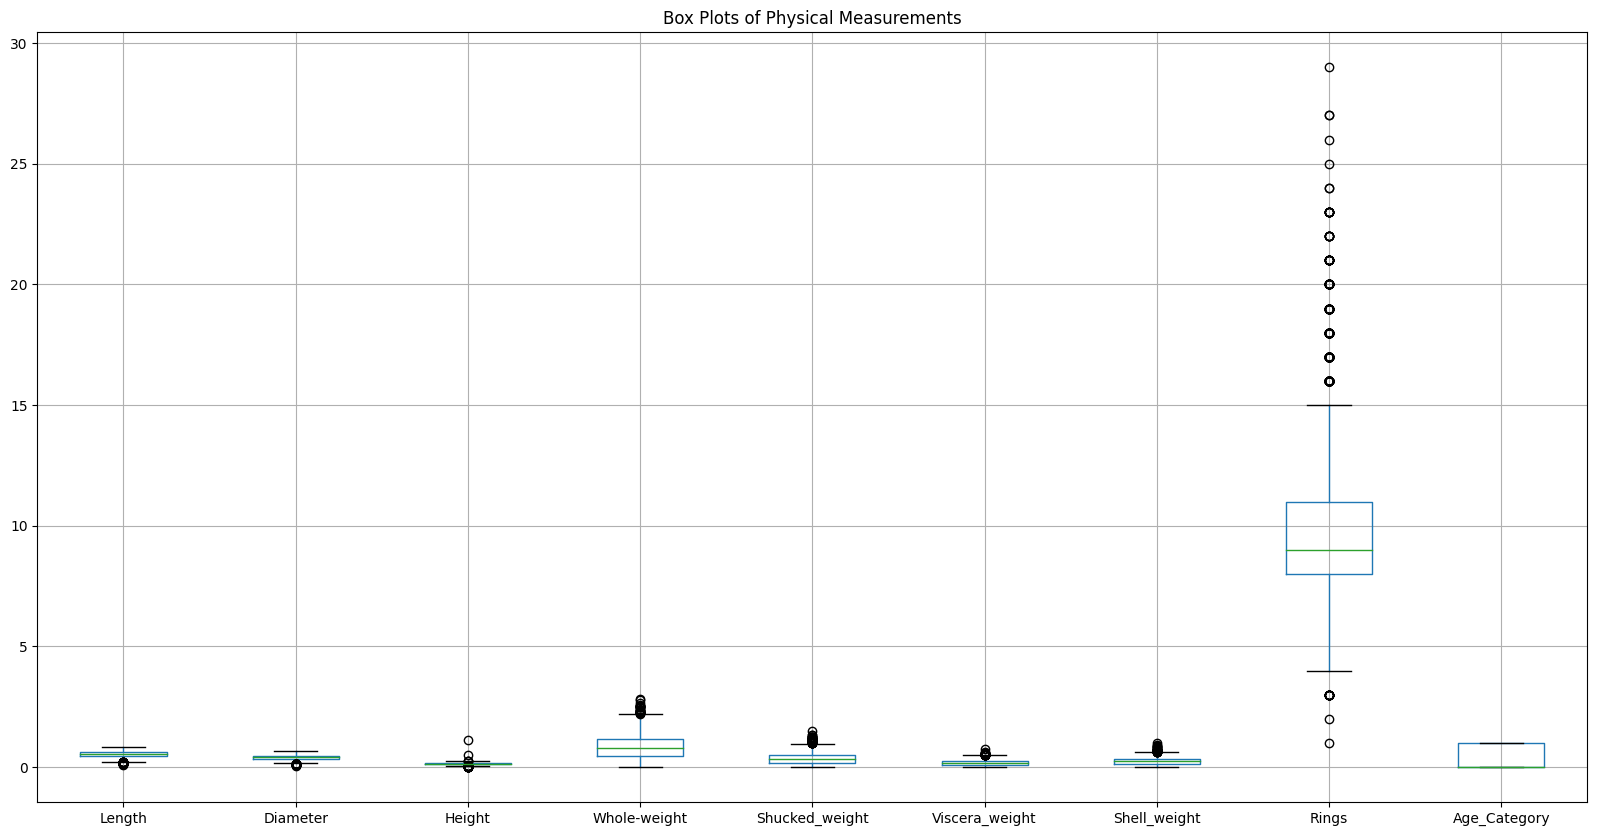

In [50]:
plt.figure(figsize=(20, 10))
df.boxplot()
plt.title('Box Plots of Physical Measurements')
plt.show()

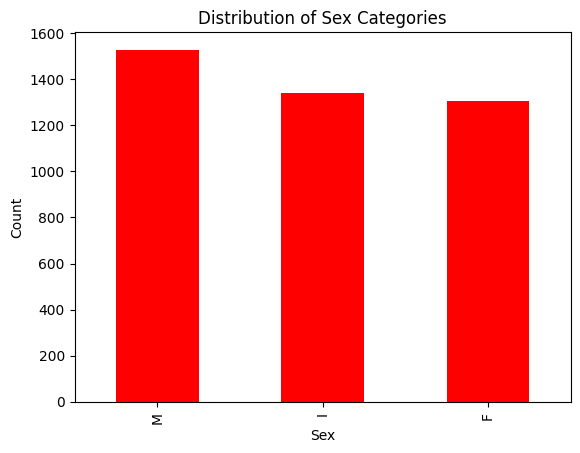

In [49]:
category_counts.plot(kind='bar', color='red')
plt.title('Distribution of Sex Categories')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


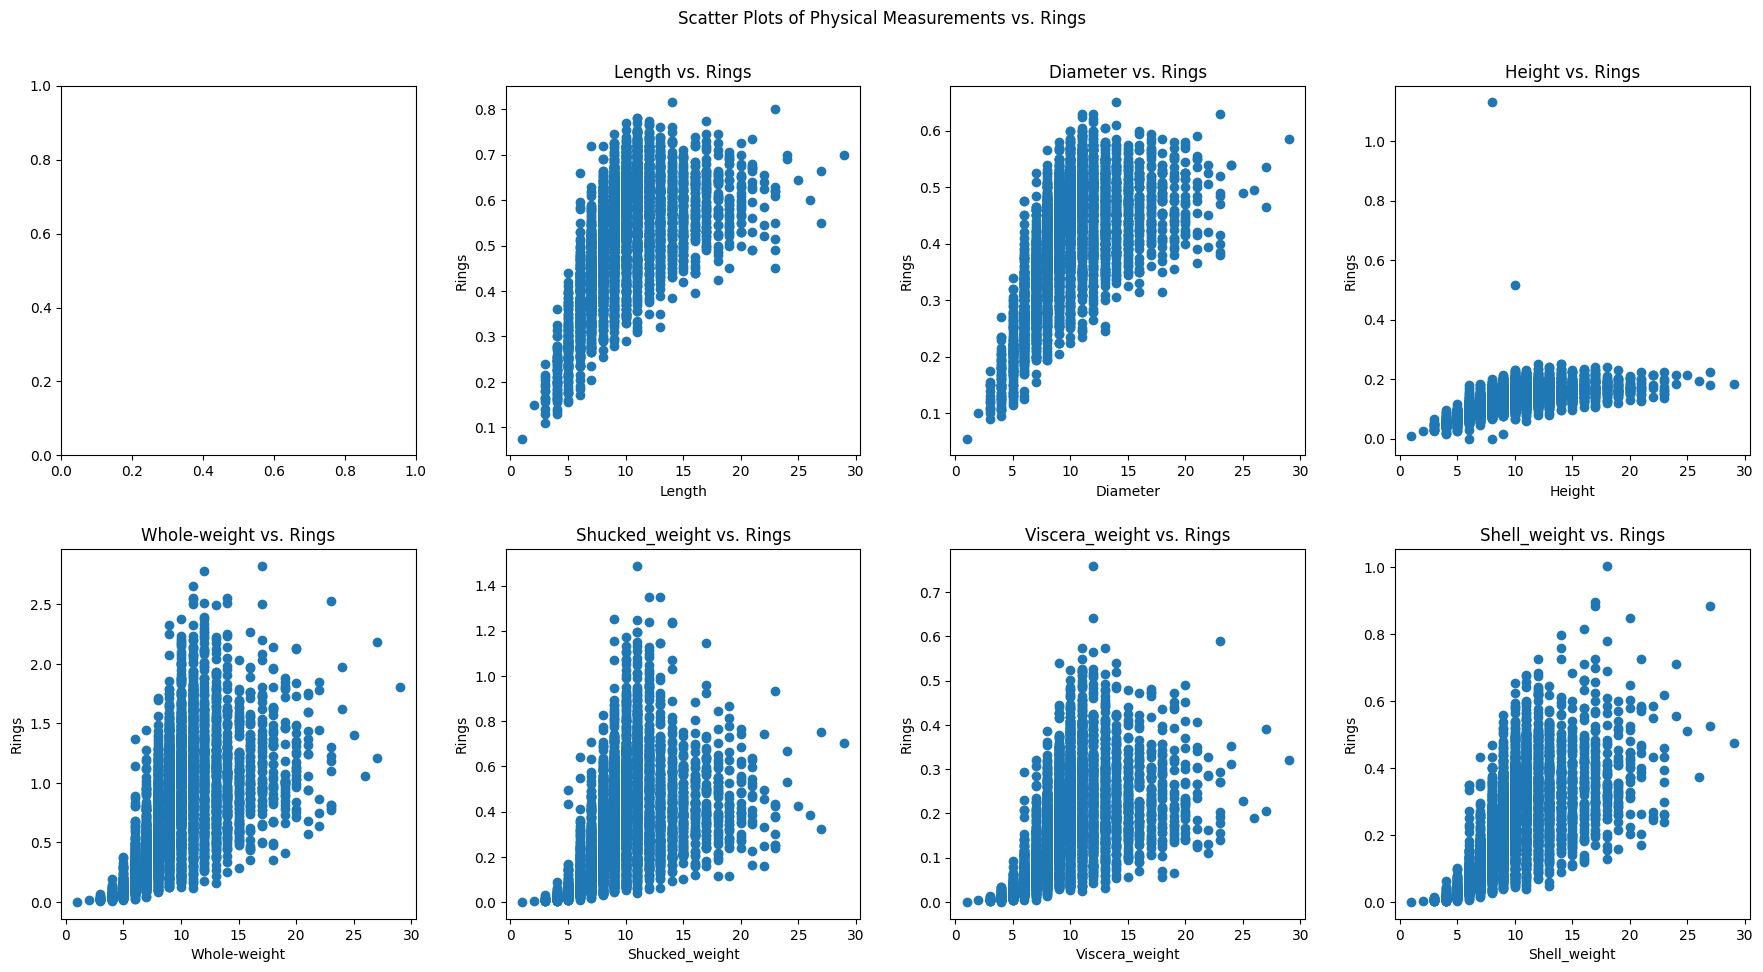

In [52]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Scatter Plots of Physical Measurements vs. Rings')
for ax, feature in zip(axes.flatten(), df.columns):
    if feature != 'Sex':
        ax.scatter(df['Rings'], df[feature])
        ax.set_title(f'{feature} vs. Rings')
        ax.set_xlabel(f'{feature}')
        ax.set_ylabel('Rings')
plt.tight_layout(pad=2)
plt.show()

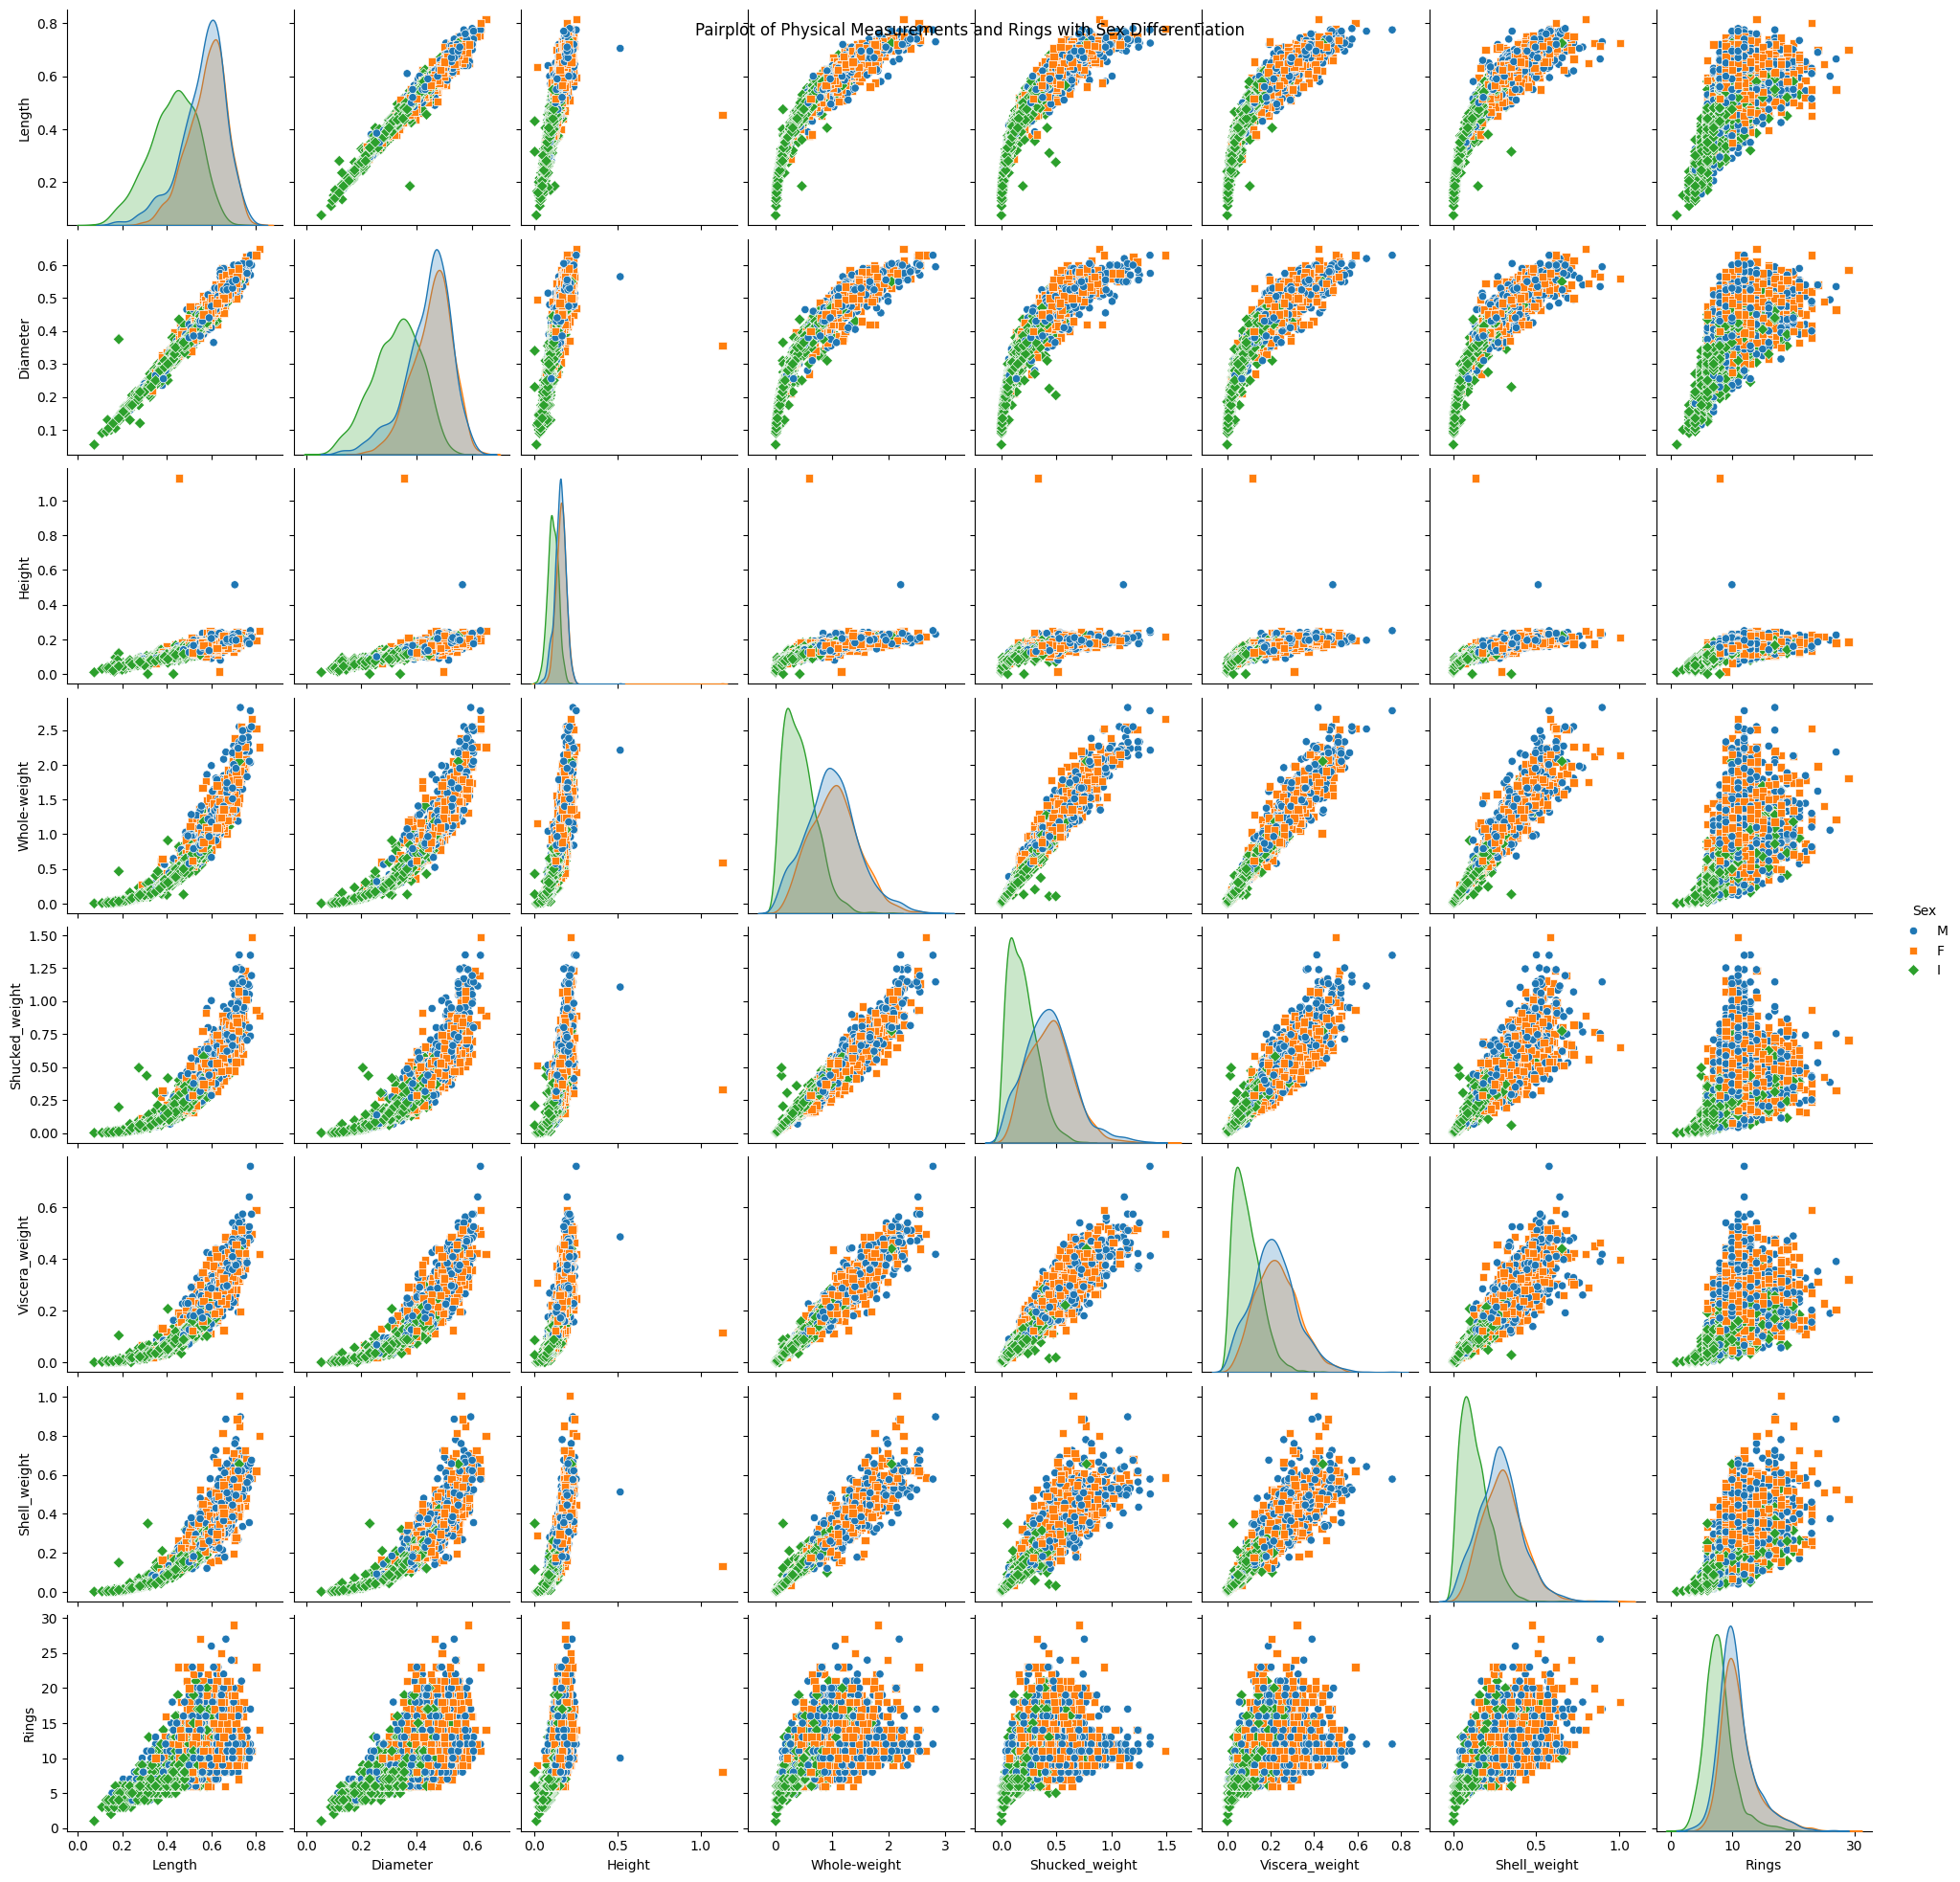

In [53]:
sns.pairplot(pyhsical_measurements.join(rings), hue='Sex', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle('Pairplot of Physical Measurements and Rings with Sex Differentiation')
plt.show()

#Splitting Data into Train/Test


In [81]:
X = df.drop(['Rings', 'Age_Category'], axis=1)
y = df['Age_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Building the Pipeline


In [82]:
categorical_features = ['Sex']
numeric_features = ['Length',	'Diameter',	'Height',	'Whole-weight',	'Shucked_weight',	'Viscera_weight',	'Shell_weight']

In [85]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
    ])

In [86]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#SVM Model

In [88]:
y_class = df['Age_Category']
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [89]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

In [90]:
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

In [91]:
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole-weight',
                                                                          'Shucked_weight',
                                                                          'Viscera_weight',
                                                                          'Shell_weight']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex'])])),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

#Executing the Model


In [95]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole-weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex'])])),
                ('regressor', LinearRegression())])

In [94]:
grid_search.fit(X_train, y_train_class)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'Whole-weight',
                                                                          'Shucked_weight',
                                                                          'Viscera_weight',
                                                                          'Shell_weight']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex'])])),
                                       ('classifier', SVC(probability=True))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

#Evaluating the models

In [92]:
# Predictions
y_pred_train = lr_pipeline.predict(X_train)
y_pred_test = lr_pipeline.predict(X_test)

# RMSE calculation
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'Linear Regression RMSE - Train: {rmse_train}, Test: {rmse_test}')

Linear Regression RMSE - Train: 2.187202344131259, Test: 2.2116130871218367


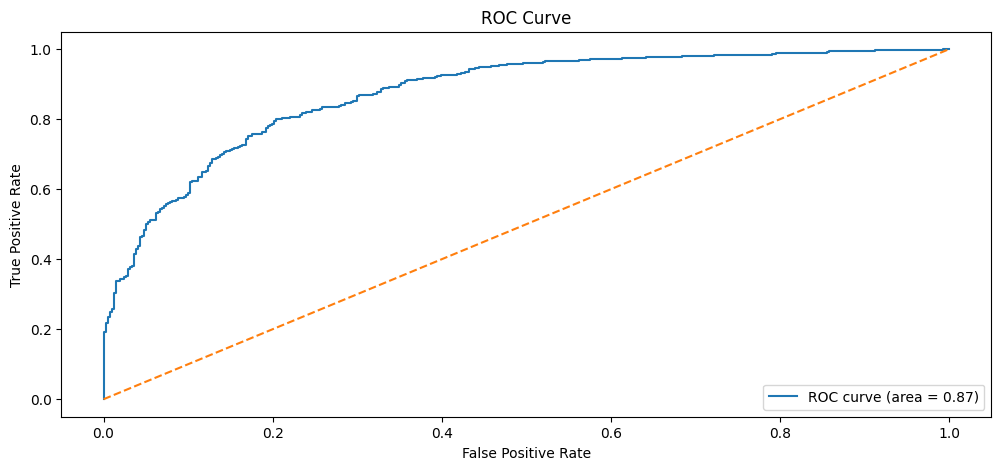

In [93]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

probabilities = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_class, probabilities)
roc_auc = auc(fpr, tpr)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



#Conclusion

The goal of this dataset was to predict the age of an abalone (rings for the linear regression and age catrgory for the SVM). In the linear regression model the RMSE values are relatively close between training and testing, suggesting that the model is generalizing well without significant overfitting. However, an RMSE of approximately 2.2, in the context of the number of rings, is moderately high. It implies that the model's predictions are, on average, about 2.2 rings away from the true values.

For the SVM model, An AUC of 0.87 is strong. It indicates that the model has a good measure of separability, meaning it is quite capable of distinguishing between the classes (old vs. young).
A higher AUC value suggests that the classifier is performing well across all thresholds, managing both false positives and false negatives effectively.

